# Classification Using Neural Networks and Deep Learning (SVHN Dataset) 

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#keras-related imports
from keras.utils import to_categorical
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Loading Data

In [3]:
train_data_file = 'train_32x32.mat'
test_data_file = 'test_32x32.mat'

In [4]:
#For Google Colab
#from google.colab import drive
#drive.mount('/content/gdrive')
#root_path = 'gdrive/My Drive/Colab Notebooks/' 
#train_data_file = root_path + '/train_32x32.mat'
#test_data_file = root_path + '/test_32x32.mat'

In [5]:
mat_train = scipy.io.loadmat(train_data_file)
mat_test = scipy.io.loadmat(test_data_file)

In [6]:
X_train = mat_train['X']
y_train = mat_train['y']
X_test = mat_test['X']
y_test = mat_test['y']

In [7]:
print('Training data shape: ', X_train.shape, y_train.shape)
print('Testing data shape: ', X_test.shape, y_test.shape)

Training data shape:  (73257, 32, 32, 3) (73257, 1)
Testing data shape:  (26032, 32, 32, 3) (26032, 1)


In [8]:
classes = np.unique(y_train)
print(classes)
num_classes = len(classes)
print('Number of classes:', num_classes)

[0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


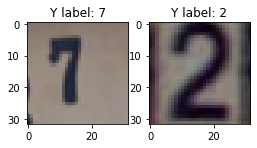

In [32]:
#Plotting few images from the training data
plt.figure(figsize = (4,4))
plt.subplot(121) #first image in 1x2 grid
plt.imshow(X_train[99])
plt.title(f'Y label: {y_train[99][0]}')

plt.subplot(122) #second image in 1x2 grid
plt.imshow(X_train[466]) 
plt.title(f'Y label: {y_train[466][0]}')

plt.show()

# Data Preprocessing

In [55]:
#Normalizing the inputs to be in the range of 0-1
X_train = X_train / 255
X_test = X_test / 255

In [56]:
#Encoding the labels to one-hot vector
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [57]:
#y_train_one_hot, y_test_one_hot

In [58]:
print('Training data shape: ', X_train.shape, y_train_one_hot.shape)
print('Testing data shape: ', X_test.shape, y_test_one_hot.shape)

Training data shape:  (73257, 32, 32, 3) (73257, 10)
Testing data shape:  (26032, 32, 32, 3) (26032, 10)


# Building the Network

In [59]:
#Setting up batch size, epochs, learning rate
batch_size = 16
epochs = 20
learning_rate = 0.01
input_image_shape = X_train.shape[1:]
print('Input image shape : ', input_image_shape)

Input image shape :  (32, 32, 3)


In [60]:
#Creating a sequential model and adding layers to it
model = Sequential()
model.add(Conv2D(filters = 64,
                 kernel_size = (5, 5), 
                 padding = 'same',
                 activation = 'relu',
                 input_shape = input_image_shape))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2, 2)))
model.add(Conv2D(filters = 64,
                 kernel_size = (5, 5), 
                 padding = 'same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2, 2)))
model.add(Conv2D(filters = 128,
                 kernel_size = (5, 5), 
                 padding = 'same',
                 activation = 'relu'))
model.add(Flatten())
model.add(Dense(units = 3072, activation = 'relu'))
model.add(Dense(units = 2048, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [61]:
#Printing model summary which includes the layer information and the output dimensions
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 3072)             

# Compiling the model

In [62]:
#Compiling the model
model.compile(optimizer = keras.optimizers.SGD(learning_rate = learning_rate), 
              loss = keras.losses.categorical_crossentropy, 
              metrics = ['accuracy'])

# Training the model

In [63]:
#Training the model
train_history = model.fit(
    x = X_train,
    y = y_train_one_hot,
    batch_size = batch_size,
    epochs = epochs,
    verbose = 1,
    validation_data = (X_test, y_test_one_hot))

Epoch 1/20
4579/4579 [==============================] - 38s 8ms/step - loss: 1.9254 - accuracy: 0.3164 - val_loss: 0.5792 - val_accuracy: 0.8299
Epoch 2/20
4579/4579 [==============================] - 37s 8ms/step - loss: 0.4736 - accuracy: 0.8609 - val_loss: 0.3905 - val_accuracy: 0.8855
Epoch 3/20
4579/4579 [==============================] - 36s 8ms/step - loss: 0.3296 - accuracy: 0.9021 - val_loss: 0.3766 - val_accuracy: 0.8901
Epoch 4/20
4579/4579 [==============================] - 37s 8ms/step - loss: 0.2544 - accuracy: 0.9263 - val_loss: 0.3194 - val_accuracy: 0.9073
Epoch 5/20
4579/4579 [==============================] - 36s 8ms/step - loss: 0.2006 - accuracy: 0.9421 - val_loss: 0.3414 - val_accuracy: 0.9034
Epoch 6/20
4579/4579 [==============================] - 36s 8ms/step - loss: 0.1551 - accuracy: 0.9554 - val_loss: 0.3366 - val_accuracy: 0.9097
Epoch 7/20
4579/4579 [==============================] - 36s 8ms/step - loss: 0.1081 - accuracy: 0.9692 - val_loss: 0.3413 - val_ac

In [64]:
#train_history.history

# Plotting Accuracies

In [65]:
#Retrieving accuracy and loss from the training history
training_accuracy = train_history.history['accuracy']
training_loss = train_history.history['loss']

testing_accuracy = train_history.history['val_accuracy']
testing_loss = train_history.history['val_loss']


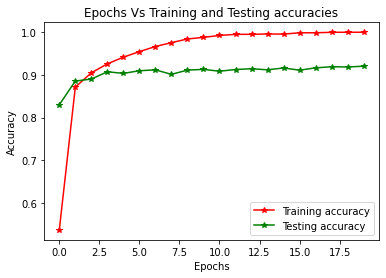

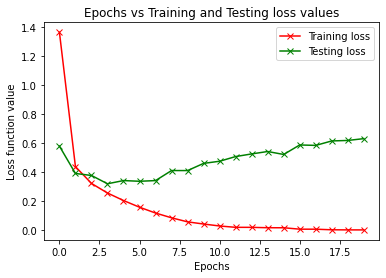

In [66]:
#Plotting accuracy and loss
epochs_range = range(epochs)
plt.plot(epochs_range, training_accuracy, color = 'red', marker = '*', 
         label = 'Training accuracy')
plt.plot(epochs_range, testing_accuracy, color = 'green', marker = '*', 
        label = 'Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Vs Training and Testing accuracies')
plt.legend()

plt.figure()
plt.plot(epochs_range, training_loss, color = 'red', marker = 'x', 
         label = 'Training loss')
plt.plot(epochs_range, testing_loss, color = 'green', marker = 'x', 
        label = 'Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function value')
plt.title('Epochs vs Training and Testing loss values')
plt.legend()

plt.show()

In [67]:
model.save('model_training_history')

INFO:tensorflow:Assets written to: model_training_history/assets


# Predicting labels

In [68]:
model_predictions = model.predict(X_test)

In [69]:
predicted_classes = np.argmax(np.round(model_predictions), axis = 1)

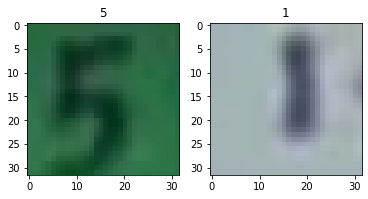

In [70]:
#Sample predictions
plt.subplot(121)
plt.imshow(X_test[0])
plt.title(predicted_classes[0])


plt.subplot(122)
plt.imshow(X_test[13])
plt.title(predicted_classes[13])

plt.show()

# Classification Report

In [71]:
#Evaluating the model against the testing data
(overall_loss, overall_accuracy) = model.evaluate(X_test, y_test_one_hot)
print('Overall model loss: ', overall_loss)
print('Overall model accuracy: ', overall_accuracy)

814/814 [==============================] - 3s 4ms/step - loss: 0.6308 - accuracy: 0.9203
Overall model loss:  0.6307752132415771
Overall model accuracy:  0.9202904105186462


In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print('Confusion Matrix \n', confusion_matrix(y_test, predicted_classes))

Confusion Matrix 
 [[1611   21   12   12    4    8   35    5   18   18]
 [  36 4863   35   27   48    8   16   47   10    9]
 [  26   35 3903   64   26    9   15   33   22   16]
 [  26   67   39 2495   17   54   20   10   36  118]
 [  19   65   21   22 2342    8   10   11    8   17]
 [  19   16   14   56   10 2174   55    3   14   23]
 [  32   18    7   14   17   38 1795    8   32   16]
 [   6   77   34   14    3    3    7 1868    2    5]
 [  29   13   14   34   16   12   54    0 1444   44]
 [  41   16   34   17    9   15    8    9    9 1437]]


In [74]:
print('Classification Report \n', classification_report(y_test, predicted_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      1744
           1       0.94      0.95      0.95      5099
           2       0.95      0.94      0.94      4149
           3       0.91      0.87      0.89      2882
           4       0.94      0.93      0.93      2523
           5       0.93      0.91      0.92      2384
           6       0.89      0.91      0.90      1977
           7       0.94      0.93      0.93      2019
           8       0.91      0.87      0.89      1660
           9       0.84      0.90      0.87      1595

    accuracy                           0.92     26032
   macro avg       0.91      0.91      0.91     26032
weighted avg       0.92      0.92      0.92     26032

